In [3]:
from fastai.vision.all import *

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
no_tumor_train=Path('/kaggle/input/brain-tumor-classification-mri/Training/no_tumor')
glioma_tumor_train=Path('/kaggle/input/brain-tumor-classification-mri/Training/glioma_tumor')
meningioma_tumor_train=Path('/kaggle/input/brain-tumor-classification-mri/Training/meningioma_tumor')
pituitary_tumor_train=Path('/kaggle/input/brain-tumor-classification-mri/Training/pituitary_tumor')

In [5]:
no_tumor_train.ls()

(#395) [Path('/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(84).jpg'),Path('/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(44).jpg'),Path('/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(245).jpg'),Path('/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/6.jpg'),Path('/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(238).jpg'),Path('/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(196).jpg'),Path('/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(108).jpg'),Path('/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(310).jpg'),Path('/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image (5).jpg'),Path('/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(186).jpg')...]

In [6]:
glioma_tumor_train.ls()

(#826) [Path('/kaggle/input/brain-tumor-classification-mri/Training/glioma_tumor/gg (180).jpg'),Path('/kaggle/input/brain-tumor-classification-mri/Training/glioma_tumor/gg (552).jpg'),Path('/kaggle/input/brain-tumor-classification-mri/Training/glioma_tumor/gg (11).jpg'),Path('/kaggle/input/brain-tumor-classification-mri/Training/glioma_tumor/gg (626).jpg'),Path('/kaggle/input/brain-tumor-classification-mri/Training/glioma_tumor/gg (541).jpg'),Path('/kaggle/input/brain-tumor-classification-mri/Training/glioma_tumor/gg (546).jpg'),Path('/kaggle/input/brain-tumor-classification-mri/Training/glioma_tumor/gg (664).jpg'),Path('/kaggle/input/brain-tumor-classification-mri/Training/glioma_tumor/gg (225).jpg'),Path('/kaggle/input/brain-tumor-classification-mri/Training/glioma_tumor/gg (399).jpg'),Path('/kaggle/input/brain-tumor-classification-mri/Training/glioma_tumor/gg (513).jpg')...]

In [7]:
meningioma_tumor_train.ls()

(#822) [Path('/kaggle/input/brain-tumor-classification-mri/Training/meningioma_tumor/m1(197).jpg'),Path('/kaggle/input/brain-tumor-classification-mri/Training/meningioma_tumor/m3 (182).jpg'),Path('/kaggle/input/brain-tumor-classification-mri/Training/meningioma_tumor/m (162).jpg'),Path('/kaggle/input/brain-tumor-classification-mri/Training/meningioma_tumor/m3 (11).jpg'),Path('/kaggle/input/brain-tumor-classification-mri/Training/meningioma_tumor/m2 (109).jpg'),Path('/kaggle/input/brain-tumor-classification-mri/Training/meningioma_tumor/m2 (89).jpg'),Path('/kaggle/input/brain-tumor-classification-mri/Training/meningioma_tumor/m3 (80).jpg'),Path('/kaggle/input/brain-tumor-classification-mri/Training/meningioma_tumor/m1(17).jpg'),Path('/kaggle/input/brain-tumor-classification-mri/Training/meningioma_tumor/m1(7).jpg'),Path('/kaggle/input/brain-tumor-classification-mri/Training/meningioma_tumor/m3 (55).jpg')...]

In [8]:
pituitary_tumor_train.ls()

(#827) [Path('/kaggle/input/brain-tumor-classification-mri/Training/pituitary_tumor/p (538).jpg'),Path('/kaggle/input/brain-tumor-classification-mri/Training/pituitary_tumor/p (374).jpg'),Path('/kaggle/input/brain-tumor-classification-mri/Training/pituitary_tumor/p (455).jpg'),Path('/kaggle/input/brain-tumor-classification-mri/Training/pituitary_tumor/p (407).jpg'),Path('/kaggle/input/brain-tumor-classification-mri/Training/pituitary_tumor/p (371).jpg'),Path('/kaggle/input/brain-tumor-classification-mri/Training/pituitary_tumor/p (138).jpg'),Path('/kaggle/input/brain-tumor-classification-mri/Training/pituitary_tumor/p (202).jpg'),Path('/kaggle/input/brain-tumor-classification-mri/Training/pituitary_tumor/p (616).jpg'),Path('/kaggle/input/brain-tumor-classification-mri/Training/pituitary_tumor/p (782).jpg'),Path('/kaggle/input/brain-tumor-classification-mri/Training/pituitary_tumor/p (628).jpg')...]

# CREATING THE DATABLOCK

In [9]:
full_set=no_tumor_train.ls()+glioma_tumor_train.ls()+meningioma_tumor_train.ls()+pituitary_tumor_train.ls()

In [10]:
full_set

(#2870) [Path('/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(84).jpg'),Path('/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(44).jpg'),Path('/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(245).jpg'),Path('/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/6.jpg'),Path('/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(238).jpg'),Path('/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(196).jpg'),Path('/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(108).jpg'),Path('/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(310).jpg'),Path('/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image (5).jpg'),Path('/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(186).jpg')...]

In [11]:
db=DataBlock()

In [12]:
ds=db.datasets(full_set)

In [13]:
ds[0]

(Path('/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(84).jpg'),
 Path('/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(84).jpg'))

In [70]:
def get_x(r):
    return r
def get_y(r):
    if 'glioma' in r.parent.name:
        return 'glioma_tumor'
    elif 'pituitary' in r.parent.name:
        return 'pituitary_tumor'
    elif 'meningioma' in r.parent.name:
        return 'meningioma_tumor'
    else:
        return 'no_tumor'

In [71]:
dblock=DataBlock(blocks=(ImageBlock,CategoryBlock),get_x=get_x,get_y=get_y)

In [72]:
ds=dblock.datasets(full_set)

In [73]:
ds[0]

(PILImage mode=RGB size=236x236, TensorCategory(2))

In [74]:
ds.vocab

['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']

In [75]:
from fastcore.parallel import *

In [76]:
def f(o): return PILImage.create(o).size
sizes = parallel(f, full_set, n_workers=8)
pd.Series(sizes).value_counts()

(512, 512)    2309
(236, 236)      46
(225, 225)      30
(256, 256)      15
(442, 442)      15
              ... 
(622, 777)       1
(626, 686)       1
(212, 280)       1
(224, 262)       1
(360, 378)       1
Name: count, Length: 361, dtype: int64

In [77]:
item_tfms=Resize(480,method='squish')

In [78]:
dblock=DataBlock(blocks=(ImageBlock,CategoryBlock),get_x=get_x,get_y=get_y,item_tfms=Resize(480,method='squish'))

In [79]:
dls=dblock.dataloaders(full_set)

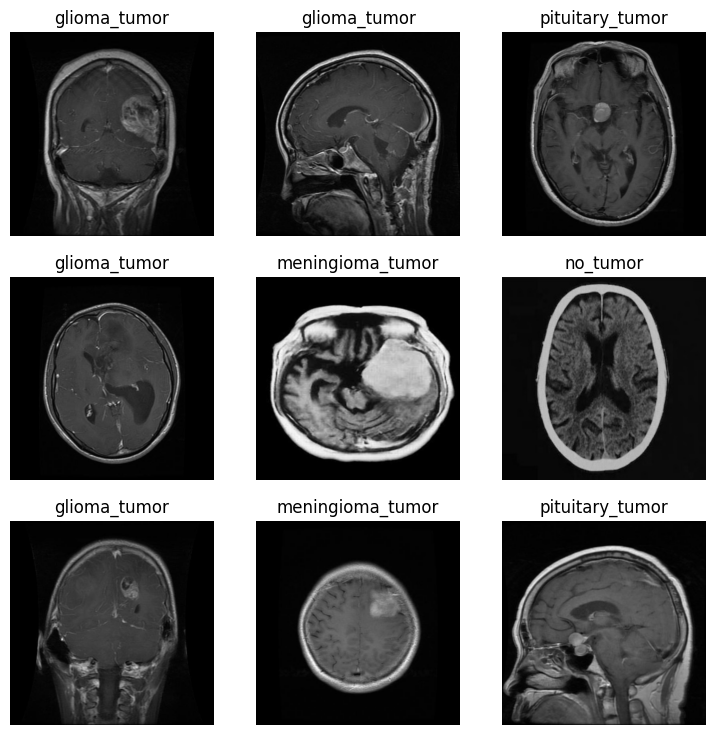

In [80]:
dls.show_batch()

In [81]:
len(dls.train.one_batch()[1])

64

In [82]:
learner = vision_learner(dls,resnet18,metrics=accuracy)

SuggestedLRs(minimum=0.00831763744354248, steep=0.0008317637839354575, valley=0.0008317637839354575)

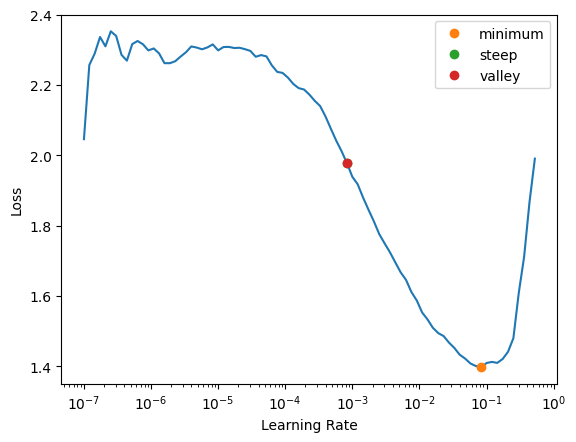

In [83]:
learner.lr_find(suggest_funcs=(minimum,steep,valley))

# Fine tuning the learner object

In [84]:
learner.fine_tune(
    4,#number of epochs
    base_lr=0.045,#learning rate
)

epoch,train_loss,valid_loss,accuracy,time
0,0.966473,1.820595,0.651568,00:18


epoch,train_loss,valid_loss,accuracy,time
0,0.692548,2.340703,0.522648,00:21
1,0.525394,0.362132,0.890244,00:20
2,0.334692,0.169163,0.956446,00:20
3,0.189429,0.079104,0.977352,00:21


# SAMPLE PREDICTION

In [85]:
test1=Path('/kaggle/input/brain-tumor-classification-mri/Testing/glioma_tumor')
test2=Path('/kaggle/input/brain-tumor-classification-mri/Testing/meningioma_tumor')
test3=Path('/kaggle/input/brain-tumor-classification-mri/Testing/no_tumor')
test4=Path('/kaggle/input/brain-tumor-classification-mri/Testing/pituitary_tumor')
test=test1.ls()+test2.ls()+test3.ls()+test4.ls()

In [86]:
import random
random_path=random.choice(test)
random_path

Path('/kaggle/input/brain-tumor-classification-mri/Testing/meningioma_tumor/image(60).jpg')

In [98]:
matched_count1=0
unmatched_count1=0
for sample in test1.ls():
    if(str(learner.predict(sample)[0]) == sample.parent.name):
        matched_count1=matched_count1+1
    else:
        unmatched_count1=unmatched_count1+1
print("Matched",matched_count1)
print("Wrong preds",unmatched_count1)

Matched 23
Wrong preds 77


In [99]:
matched_count2=0
unmatched_count2=0
for sample in test2.ls():
    if(str(learner.predict(sample)[0]) == sample.parent.name):
        matched_count2=matched_count2+1
    else:
        unmatched_count2=unmatched_count2+1
print("Matched",matched_count2)
print("Wrong preds",unmatched_count2)

Matched 111
Wrong preds 4


In [100]:
matched_count3=0
unmatched_count3=0
for sample in test3.ls():
    if(str(learner.predict(sample)[0]) == sample.parent.name):
        matched_count3=matched_count3+1
    else:
        unmatched_count3=unmatched_count3+1
print("Matched",matched_count3)
print("Wrong preds",unmatched_count3)

Matched 105
Wrong preds 0


In [101]:
matched_count4=0
unmatched_count4=0
for sample in test4.ls():
    if(str(learner.predict(sample)[0]) == sample.parent.name):
        matched_count4=matched_count4+1
    else:
        unmatched_count4=unmatched_count4+1
print("Matched",matched_count4)
print("Wrong preds",unmatched_count4)

Matched 40
Wrong preds 34


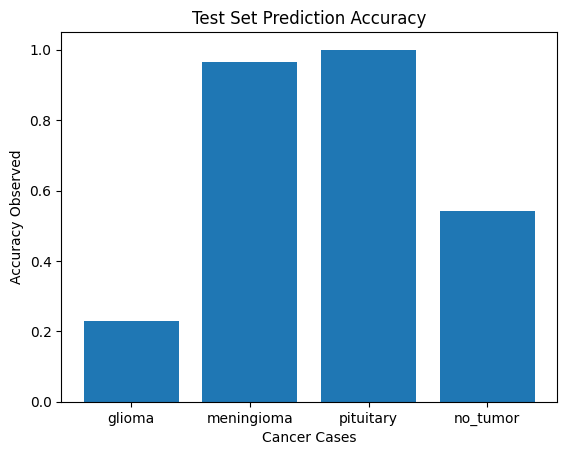

In [105]:
import matplotlib.pyplot as plt
value1=matched_count1/(matched_count1+unmatched_count1)
value2=matched_count2/(matched_count2+unmatched_count2)
value3=matched_count3/(matched_count3+unmatched_count3)
value4=matched_count4/(matched_count4+unmatched_count4)
values=[value1,value2,value3,value4]
types=['glioma','meningioma','pituitary','no_tumor']
plt.bar(types,values)
plt.xlabel("Cancer Cases")
plt.ylabel("Accuracy Observed")
plt.title("Test Set Prediction Accuracy")
plt.show()

In [96]:
learner.predict(random_path),random_path

(('meningioma_tumor',
  tensor(1),
  tensor([2.3568e-05, 9.9997e-01, 1.4281e-06, 2.7658e-06])),
 Path('/kaggle/input/brain-tumor-classification-mri/Testing/meningioma_tumor/image(60).jpg'))